In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

In [2]:
"""
cloud = 0
dust = 1
haze = 2
land = 3
seaside = 4
smoke = 5
"""

'\ncloud = 0\ndust = 1\nhaze = 2\nland = 3\nseaside = 4\nsmoke = 5\n'

In [65]:
for cat, label in {'Cloud':0, 'Dust':1, 'Haze':2, 'Land':3, 'Seaside':5, 'Smoke':6}.items():
    
    all_images = []
    folder_rel_loc = "\\image_folder\\smoke_dataset\\"
    category = cat
    directory = os.path.dirname(os.path.realpath('__file__')) + folder_rel_loc + category

    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".tif"):
            img_name = directory + "\\" + filename
            pil_im = Image.open(img_name)
            im_array = np.asarray(pil_im)
            image_tuple = np.array([[im_array],np.array([label])])
            all_images.append(image_tuple)
            #plt.imshow(im_array)
            #plt.show()
        else:
            continue
    all_images = np.array(all_images)
    np.save(category + '_images.npy', all_images)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1016/1016 [00:02<00:00, 409.44it/s]


In [27]:
all_image_data = []
for category in tqdm(['Cloud', 'Dust', 'Haze', 'Land', 'Seaside', 'Smoke']):    
    images = np.load('trad_gan_augmented_images/' + category + '_images.npy', allow_pickle=True)
    all_image_data.append(images)
final_image_data = np.array(all_image_data)
np.save('trad_gan_augmentation_image_data.npy', final_image_data)

100%|██████████| 6/6 [00:02<00:00,  2.30it/s]


In [28]:
all_data = np.load('trad_augmentation_image_data.npy', allow_pickle = True)

In [29]:
for item in all_data:
    print(item.shape)

(5818, 2, 1)
(5045, 2, 1)
(5010, 2, 1)
(5135, 2, 1)
(5032, 2, 1)
(5079, 2, 1)


In [25]:
all_data[0][0][0][0].shape

(256, 256, 3)

In [7]:
all_images_no_classes = []
for image_class in all_data:
    for image in tqdm(image_class, ncols = 100):
        all_images_no_classes.append(image)

100%|██████████████████████████████████████████████████████| 2016/2016 [00:00<00:00, 1085457.88it/s]


In [8]:
all_images_no_classes = np.array(all_images_no_classes)

In [9]:
np.save('GAN_augmented_all_images_no_classes.npy', all_images_no_classes)

In [11]:
data = np.load('GAN_augmented_all_images_no_classes.npy', allow_pickle = True)

In [12]:
data[0]

array([[array([[[ 19,  13,  13],
        [ 17,  12,  12],
        [ 13,  10,  10],
        ...,
        [ 38,  36,  41],
        [ 37,  35,  40],
        [ 40,  37,  42]],

       [[ 16,  11,  11],
        [ 14,  11,  11],
        [ 15,  11,  10],
        ...,
        [ 44,  41,  46],
        [ 46,  43,  48],
        [ 49,  46,  51]],

       [[ 15,  11,  10],
        [ 15,  11,  10],
        [ 18,  13,  11],
        ...,
        [ 47,  44,  49],
        [ 53,  50,  55],
        [ 51,  49,  53]],

       ...,

       [[ 15,  11,  10],
        [ 17,  12,  11],
        [ 24,  16,  15],
        ...,
        [ 74,  73,  78],
        [ 40,  39,  46],
        [ 41,  39,  46]],

       [[ 20,  14,  12],
        [ 22,  15,  14],
        [ 26,  17,  15],
        ...,
        [ 26,  24,  31],
        [ 42,  40,  47],
        [100,  97, 101]],

       [[ 21,  14,  13],
        [ 25,  17,  15],
        [ 23,  16,  14],
        ...,
        [ 22,  21,  29],
        [ 58,  55,  61],
        [107, 10

In [41]:
np.random.shuffle(data)

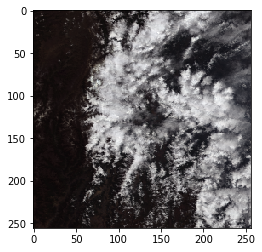

In [18]:
plt.imshow(data[0][0][0])

In [22]:
data[0][0][0].shape

(256, 256, 3)